1\)

Least Squares Cost Function: $$g(\tilde W)=\dfrac{1}{P} \sum_{p=1}^{P}(\tilde X_{p}^{T} \tilde W - y_{p})^{2}$$
1st Derivative: $$\nabla g(\tilde W)=\dfrac{2}{P} \sum_{p=1}^{P}\tilde X_{p}(\tilde X_{p}^{T} \tilde W - y_{p})$$
2nd Derivative: $$\nabla^{2} g(\tilde W)=\dfrac{2}{P} \sum_{p=1}^{P}\tilde X_{p} \tilde X_{p}^{T}$$

2\)
$$\sigma(t) = \dfrac{1}{1+e^{-t}}$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{-1}{(1+e^{-t})^2}(-e^{-t})$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{-1}{(1+e^{-t})} \dfrac{e^{-t}}{(1+e^{-t})}$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{1}{(1+e^{-t})} \dfrac{1}{(1+e^{t})}$$
$$1-\sigma(t) = 1-\dfrac{1}{1+e^{-t}} = \dfrac{(1+e^{-t})-1}{1+e^{-t}} = \dfrac{1}{1+e^{t}}$$
$$\dfrac{d\sigma(t)}{dt} = \sigma(t) (1-\sigma(t))$$

3\)

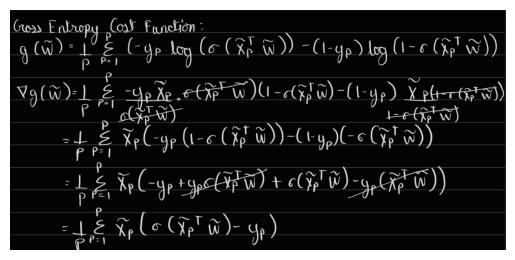

In [27]:
import matplotlib.pyplot as plt
image = plt.imread('img.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

4\)

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data[:,0:4]
Y = iris.target

import numpy as np
ones = np.ones(X.shape[0], dtype=float)
X = np.column_stack((ones, X))

In [2]:
def activation(Z):
    act = 1./(1.+np.exp(-np.clip(Z,-250,250)))
    return( act )

In [3]:
from sklearn.preprocessing import OneHotEncoder

def onehot(Y):
    onehot_encoder = OneHotEncoder(sparse_output=False)
    integer_encoded = Y.reshape(len(Y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return(onehot_encoded)

Y = onehot(Y)

In [4]:
def argmax(Z):
    maxz = max(Z)
    for j in range(len(Z)):
        Z[j] = 1.0 if Z[j]>=maxz else 0
    return(Z)

[[-0.00522213 -0.30185178  0.76060218 -0.47767885 -0.06218997]
 [ 0.05126072 -0.16860986 -0.17448603 -0.07526894  0.62881891]
 [ 0.01135187 -0.21433833 -0.25750676  0.38274848  0.33789856]]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0

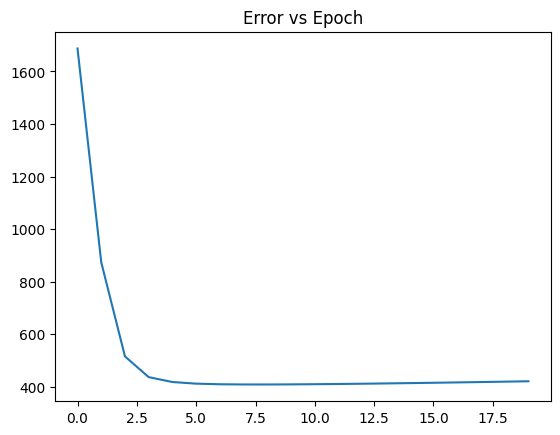

In [5]:

def crossentropy_loss(Y, Y_pred):
    e = 1e-15 # For preventing log(0) error
    loss = -Y*np.log(Y_pred)-(1+Y)*np.log(1-Y_pred)
    return loss

def perceptron_sgd(X, Y, a, epochs=100):
    errors = []
    total_error = 0
    error = [0,0,0]

    W = np.random.rand(Y.shape[1], X.shape[1]) #3x5

    for t in range(epochs):
        total_error = 0
        for i,x in enumerate(X):
            for j in range(Y.shape[1]):
                Y_pred = np.dot(x.T, W[j])
                Y_pred = activation(Y_pred)
                error[j] = crossentropy_loss(Y[i,j], Y_pred)
                dw = -x*(Y[i,j]-Y_pred)
                W[j] -= a*dw
                total_error += error[j]
        errors.append(total_error)
    return W, errors

W, errors = perceptron_sgd(X, Y, 5e-4, epochs=20)
print(W)

Y_pred = np.dot(X, W.T)
for i, y_pred in enumerate(Y_pred):
    Y_pred[i] = argmax(y_pred)
    print(Y_pred[i],' ', Y[i])

plt.title("Error vs Epoch")
plt.plot(range(len(errors)), errors)
plt.show()

Correlation in Features

In [30]:
import pandas as pd

def mosthighlycorrelated(mydataframe, numtoreport): 
    cormatrix = mydataframe.corr() 
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T 
    cormatrix = cormatrix.stack() 
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()  
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"] 
    return cormatrix.head(numtoreport)

irisp = pd.DataFrame(iris.data,columns=iris.feature_names)
print("Most Highly Correlated")
print(mosthighlycorrelated(irisp,4))
print('\n',irisp.head())

Most Highly Correlated
       FirstVariable     SecondVariable  Correlation
0  petal length (cm)   petal width (cm)     0.962865
1  sepal length (cm)  petal length (cm)     0.871754
2  sepal length (cm)   petal width (cm)     0.817941
3   sepal width (cm)  petal length (cm)    -0.428440

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


There is a high correlation between feature 1 and 2. Because of the correlation, the model fails to get a high accuracy. That is the reason why my classifications for class 1 are incorrect.

5\)

In [ ]:
X = iris.data[:,0:4]
Y = iris.target
ones = np.ones(X.shape[0], dtype=float)
X = np.column_stack((ones, X))

from sklearn.linear_model import LogisticRegression
Reg = LogisticRegression()
Reg.fit(X, Y)
res = Reg.predict(X)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(Y, res))


Accuracy:  0.9733333333333334


c:\Users\deves\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Because of correlation in features 1 and 2, the sklearn model performs better than in 4 but fails to converge. 